基于原型的聚类算法：KMeans算法

假设你有一组客户数据，每个客户都有一些特征，比如年龄、收入和购买历史。现在，你想将这些客户分成两组。对于分类问题，你可以设定一个规则，比如将年龄小于30岁的客户归为一组，年龄大于30岁的客户归为另一组。这样，你的目标就是判断每个客户属于哪个年龄段。对于聚类问题，你可以不设定任何规则，而是让算法根据客户之间的相似性自动将他们分成两组。比如，算法可能会发现有一组客户年龄较轻且收入较高，另一组客户年龄较老且收入较低。这样，你的目标就是找到数据中的自然分组或集群。分类问题通常基于明确规则或阈值进行分类，而聚类问题则基于数据之间的相似性进行分组，以发现数据中的自然集群。

k-means 算法是根据给定的 n 个数据对象的数据集，构建 k 个划分聚类的方法，每个划分聚类即为一个簇。该方法将数据划分为 n 个簇，每个簇至少有一个数据对象，每个数据对象必须属于而且只能属于一个簇。同时要满足同一簇中的数据对象相似度高，不同簇中的数据对象相似度较小。聚类相似度是利用各簇中对象的均值来进行计算的。

K-Means算法的基本流程如下：

  选择K值：需要确定要将数据集分成多少个类别，即簇的数量K。这一参数往往在最开始就需要设定好。

初始化质心：随机从数据集中选择K个点作为初始的簇中心。这些点通常是数据集中的任意点，但最常见的是选择K个数据点的均值作为初始质心。

分配数据点：接下来，算法会遍历数据集中的每个点，并根据这些点与簇中心的距离，将其分配给最近的簇中心。这个过程叫做“分配”。计算每个数据点到每个质心的距离时，通常使用欧几里得距离或余弦相似度等度量方法。

 重新计算质心：一旦数据点被分配给了各自的簇，算法会重新计算每个簇的质心。这是通过取每个簇中所有点的坐标的平均值来完成的。新的质心将被设置为每个簇所有点的平均位置。

 迭代优化：然后，算法回到步骤3，再次分配数据点，并重新计算质心。这个过程会重复进行多次，直到达到预设的迭代次数或质心位置的变化小于某个预设的阈值。这个阈值用于判断质心是否已经稳定，即是否已经收敛。

 输出结果：最后，算法会输出K个簇和每个数据点的归属。每个数据点将属于与其最近的质心所在的簇。同时，还会输出每个簇的质心位置，这些质心表示了每个簇的中心点或平均形态。


KMeans算法对初始质心的选择和K值的确定非常敏感。不同的初始质心可能会导致完全不同的聚类结果，而K值的选取也会影响聚类的质量和效果。通过迭代并尝试不同的K值和初始质心，以找到最佳的聚类结果。最佳K值往往通过肘部图法获得，也就是绘制silhoutte稀疏随k的变化曲线找到曲线拐点即可。

Cluster centers:
[[0.53153388 0.17888263]
 [0.19151287 0.57677357]
 [0.77266944 0.7148866 ]]
[2 0 1 2 1 1 1 0 0 0 0 1 1 0 0 0 2 0 1 1 0 1 0 1 1 0 1 0 2 1 2 1 1 0 0 2 0
 2 0 1 0 2 2 2 0 0 1 0 0 1 1 2 2 1 0 1 1 1 2 1 1 1 1 2 0 1 2 2 0 1 1 2 0 1
 2 2 0 1 2 2 1 0 0 1 1 1 1 1 2 1 2 0 1 2 0 2 0 0 1 2]


<Figure size 2000x1000 with 0 Axes>

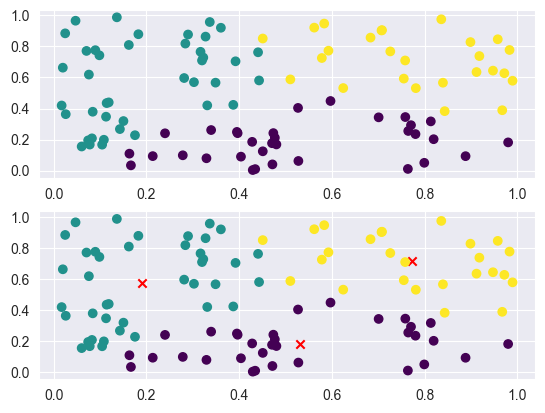

In [15]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
x = np.random.rand(100,2)
kmeans = KMeans(n_clusters =3)
kmeans.fit(x)
# 输出聚类中心点  
print("Cluster centers:")  
print(kmeans.cluster_centers_)
labels = kmeans.predict(x)
print(labels)
# 分别获取数据点的 x 和 y 坐标
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(2,1)
x_coords, y_coords = x[:, 0], x[:, 1]
# 绘制数据点
ax[0].scatter(x_coords, y_coords, c=labels, cmap='viridis')  # 使用不同的颜色表示不同的簇
# 获取聚类中心的 x 和 y 坐标
center_x, center_y = kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]
ax[1].scatter(center_x, center_y, c='red', marker='x')
ax[1].scatter(x_coords,y_coords, c=labels,cmap='viridis')
plt.show()

[[0.82256378 0.47663928]
 [0.26344857 0.21237987]
 [0.33507698 0.78729276]]
[2. 0. 2. 2. 2. 2. 1. 1. 0. 1. 1. 2. 2. 1. 0. 1. 2. 0. 1. 2. 1. 2. 1. 1.
 2. 1. 2. 0. 0. 2. 2. 1. 2. 1. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 2. 0. 2. 2. 1. 0. 2. 2. 2. 2. 0. 0. 1. 0. 0. 1. 1. 2. 0.
 1. 1. 0. 0. 0. 1. 2. 2. 1. 1. 0. 2. 2. 1. 1. 1. 0. 2. 2. 1. 2. 2. 1. 0.
 1. 1. 1. 2.]


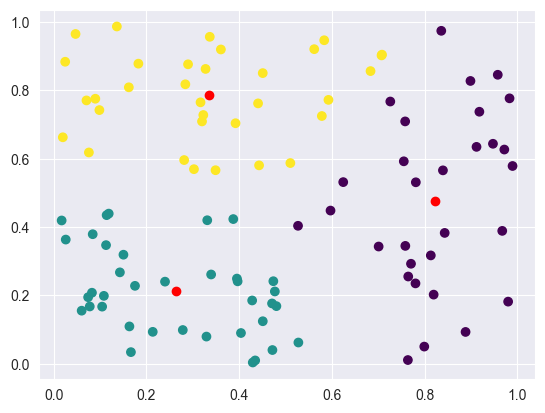

In [28]:
import numpy as np
def init_cent(dataset,K):
    idx=np.random.choice(np.arange(len(dataset)),size=K,replace=False)
    return dataset[idx]
def Kmeans_1(dataset,K,init_cent):
    centroids=init_cent(dataset,K)
    cluster=np.zeros(len(dataset))
    changed=True
    while changed:
        changed=False
        loss=0
        for i,data in enumerate(dataset):
            dis=np.sum((centroids-data)**2,axis=-1)
            k=np.argmin(dis)
            if cluster[i]!=k:
                cluster[i]=k
                changed=True
            loss+=np.sum((data-centroids[k])**2)
        for i in range(K):
            centroids[i]=np.mean(dataset[cluster==i],axis=0)
    return centroids,cluster
init_cent_1 = init_cent(x,3)
centerpoint,cluster_1 = Kmeans_1(x,3,init_cent) #第三个量是要调用函数
print(centerpoint)
print(cluster_1)
x_wei,y_wei = x[:,0],x[:,1]
plt.scatter(x_wei,y_wei,c=cluster_1,cmap='viridis')
plt.scatter(centerpoint[:,0],centerpoint[:,1],c='red')